# Pymaceuticals Inc.
---

### Analysis

- Drug regiman Capomulin and Ramicane were most often utilized for testing.
- Capomulin and Ramicane had more success in decreasing the tumor size vs Infubinol and Ceftamin.
- There is positive correlation in mouse weight vs tumor size. As the mouse weight increases, so does the tumor size. 
- There is even spread amongst testing male vs female mice.


 

In [16]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_results=pd.merge(mouse_metadata, study_results)

# Display the data table for preview
combined_results.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [17]:
# Checking the number of mice.
number_of_mice = combined_results['Mouse ID'].nunique()
number_of_mice

249

In [20]:
duplicate_mice = combined_results.loc[combined_results.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [21]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice = combined_results.loc[combined_results["Mouse ID"] == "g989", :]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [27]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
new_df = combined_results[combined_results['Mouse ID'].isin(duplicate_mice)==False]
new_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [28]:
# Checking the number of mice in the clean DataFrame.
new_mice_count = new_df["Mouse ID"].nunique()
new_mice_count

249

## Summary Statistics

In [177]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean = new_df['Tumor Volume (mm3)'].groupby(new_df['Drug Regimen']).mean()
median = new_df['Tumor Volume (mm3)'].groupby(new_df['Drug Regimen']).median()
variance = new_df['Tumor Volume (mm3)'].groupby(new_df['Drug Regimen']).var()
std = new_df['Tumor Volume (mm3)'].groupby(new_df['Drug Regimen']).std()
sem = new_df['Tumor Volume (mm3)'].groupby(new_df['Drug Regimen']).sem()

# Assemble the resulting series into a single summary DataFrame.
statistic_summary = pd.DataFrame({"Mean Tumor Volume":mean,
                                 "Median Tumor Volume":median,
                                 "Tumor Volume Variance":var,
                                 "Tumor Volume Std. Dev.":std,
                                 "Tumor Volume Std. Err.":sem})
statistic_summary


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [43]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summary_aggregation = new_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_aggregation

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice Tested')

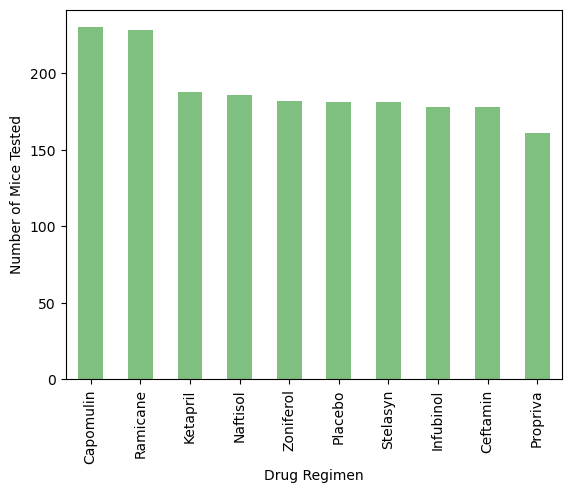

In [67]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
new_count = new_df["Drug Regimen"].value_counts()
new_count

plot_pandas = new_count.plot.bar(color='green', alpha = 0.5)  
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")



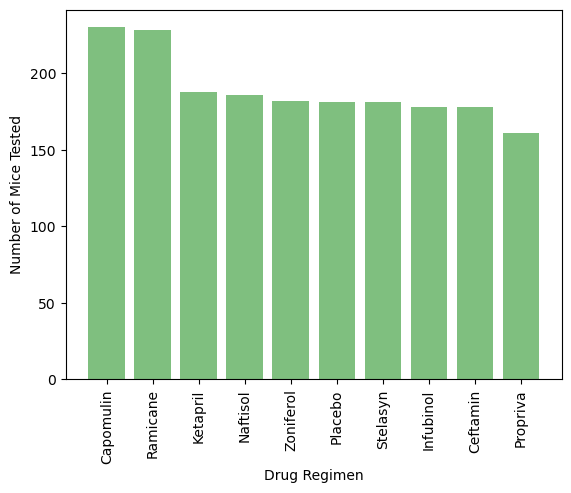

In [61]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = new_count.index.values
y_axis = new_count.values

plt.bar(x_axis, y_axis, color='green', alpha=0.5, align='center')

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.xticks(rotation="vertical")

plt.show()

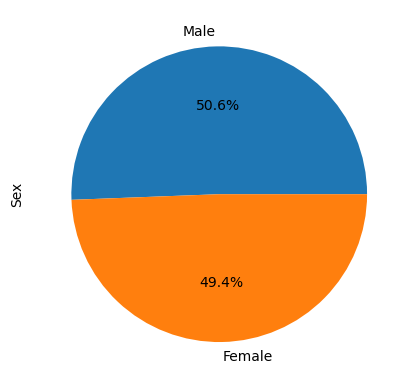

In [79]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

f_vs_m = new_df['Sex'].value_counts()
f_vs_m.plot.pie(autopct= "%1.1f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [89]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

Capomulin = new_df.loc[new_df['Drug Regimen'] == "Capomulin",:]
Ramicane = new_df.loc[new_df['Drug Regimen'] == "Ramicane",:]
Infubinol = new_df.loc[new_df['Drug Regimen'] == "Infubinol",:]
Ceftamin = new_df.loc[new_df['Drug Regimen'] == "Ceftamin",:]


# Start by getting the last (greatest) timepoint for each mouse
last_Capomulin = Capomulin.groupby('Mouse ID').max()['Timepoint']
volume = pd.DataFrame(last_Capomulin)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Capomulin_df = pd.merge(volume, new_df, on =('Mouse ID', 'Timepoint'), how = "left")
Capomulin_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [90]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds

    #for Capomulin
Capomulin_tumor = Capomulin_df["Tumor Volume (mm3)"]

all_quartiles =Capomulin_tumor.quantile([.25,.5,.75])
lower_quartile = all_quartiles[0.25]
upper_quartile = all_quartiles[0.75]
IQR = upper_quartile - lower_quartile

lower_bound = lower_quartile - (1.5*IQR)
upper_bound = upper_quartile + (1.5*IQR)

#print 
print(f"Lower quartile of tumor volume with Capomulin: {lower_quartile}")
print(f"Upper quartile of tumor volume with Capomulin: {upper_quartile}")
print(f"Interquartile range of tumors with Capomulin: {IQR}")
print(f"The median of Capomulin tumors: {all_quartiles [0.5]} ")


print(f"All of the values below {lower_bound} could be outliers.")
print(f"All of the values above {upper_bound} could be outliers.")

    

Lower quartile of tumor volume with Capomulin: 32.37735684
Upper quartile of tumor volume with Capomulin: 40.1592203
Interquartile range of tumors with Capomulin: 7.781863460000004
The median of Capomulin tumors: 38.1251644 
All of the values below 20.70456164999999 could be outliers.
All of the values above 51.83201549 could be outliers.


In [91]:
#for Ramicane
# Start by getting the last (greatest) timepoint for each mouse
last_Ramicane = Ramicane.groupby('Mouse ID').max()['Timepoint']
volume = pd.DataFrame(last_Ramicane)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Ramicane_df = pd.merge(volume, new_df, on =('Mouse ID', 'Timepoint'), how = "left")
Ramicane_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [92]:
#for Ramicane - caluclate quartiles
Ramicane_tumor = Ramicane_df["Tumor Volume (mm3)"]

all_quartiles =Ramicane_tumor.quantile([.25,.5,.75])
lower_quartile = all_quartiles[0.25]
upper_quartile = all_quartiles[0.75]
IQR = upper_quartile - lower_quartile

lower_bound = lower_quartile - (1.5*IQR)
upper_bound = upper_quartile + (1.5*IQR)

#print 
print(f"Lower quartile of tumor volume with Ramicane: {lower_quartile}")
print(f"Upper quartile of tumor volume with Ramicane: {upper_quartile}")
print(f"Interquartile range of tumors with Ramicane: {IQR}")
print(f"The median of Ramicane tumors: {all_quartiles [0.5]} ")


print(f"All of the values below {lower_bound} could be outliers.")
print(f"All of the values above {upper_bound} could be outliers.")

Lower quartile of tumor volume with Ramicane: 31.56046955
Upper quartile of tumor volume with Ramicane: 40.65900627
Interquartile range of tumors with Ramicane: 9.098536719999998
The median of Ramicane tumors: 36.56165229 
All of the values below 17.912664470000003 could be outliers.
All of the values above 54.30681135 could be outliers.


In [93]:
#for Infubinol
# Start by getting the last (greatest) timepoint for each mouse
last_Infubinol = Infubinol.groupby('Mouse ID').max()['Timepoint']
volume = pd.DataFrame(last_Infubinol)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Infubinol_df = pd.merge(volume, new_df, on =('Mouse ID', 'Timepoint'), how = "left")
Infubinol_df.head()


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [94]:
#for Infubinol - caluclate quartiles
Infubinol_tumor = Infubinol_df["Tumor Volume (mm3)"]

all_quartiles =Infubinol_tumor.quantile([.25,.5,.75])
lower_quartile = all_quartiles[0.25]
upper_quartile = all_quartiles[0.75]
IQR = upper_quartile - lower_quartile

lower_bound = lower_quartile - (1.5*IQR)
upper_bound = upper_quartile + (1.5*IQR)

#print 
print(f"Lower quartile of tumor volume with Infubinol: {lower_quartile}")
print(f"Upper quartile of tumor volume with Infubinol: {upper_quartile}")
print(f"Interquartile range of tumors with Infubinol: {IQR}")
print(f"The median of Infubinol tumors: {all_quartiles [0.5]} ")


print(f"All of the values below {lower_bound} could be outliers.")
print(f"All of the values above {upper_bound} could be outliers.")

Lower quartile of tumor volume with Infubinol: 54.04860769
Upper quartile of tumor volume with Infubinol: 65.52574285
Interquartile range of tumors with Infubinol: 11.477135160000003
The median of Infubinol tumors: 60.16518046 
All of the values below 36.83290494999999 could be outliers.
All of the values above 82.74144559000001 could be outliers.


In [95]:
#for Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
last_Ceftamin = Ceftamin.groupby('Mouse ID').max()['Timepoint']
volume = pd.DataFrame(last_Ceftamin)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Ceftamin_df = pd.merge(volume, new_df, on =('Mouse ID', 'Timepoint'), how = "left")
Ceftamin_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [96]:
#for Ceftamin - caluclate quartiles
Ceftamin_tumor = Ceftamin_df["Tumor Volume (mm3)"]

all_quartiles =Ceftamin_tumor.quantile([.25,.5,.75])
lower_quartile = all_quartiles[0.25]
upper_quartile = all_quartiles[0.75]
IQR = upper_quartile - lower_quartile

lower_bound = lower_quartile - (1.5*IQR)
upper_bound = upper_quartile + (1.5*IQR)

#print 
print(f"Lower quartile of tumor volume with Ceftamin: {lower_quartile}")
print(f"Upper quartile of tumor volume with Ceftamin: {upper_quartile}")
print(f"Interquartile range of tumors with Ceftamin: {IQR}")
print(f"The median of Ceftamin tumors: {all_quartiles [0.5]} ")


print(f"All of the values below {lower_bound} could be outliers.")
print(f"All of the values above {upper_bound} could be outliers.")

Lower quartile of tumor volume with Ceftamin: 48.72207785
Upper quartile of tumor volume with Ceftamin: 64.29983003
Interquartile range of tumors with Ceftamin: 15.577752179999997
The median of Ceftamin tumors: 59.85195552 
All of the values below 25.355449580000002 could be outliers.
All of the values above 87.66645829999999 could be outliers.


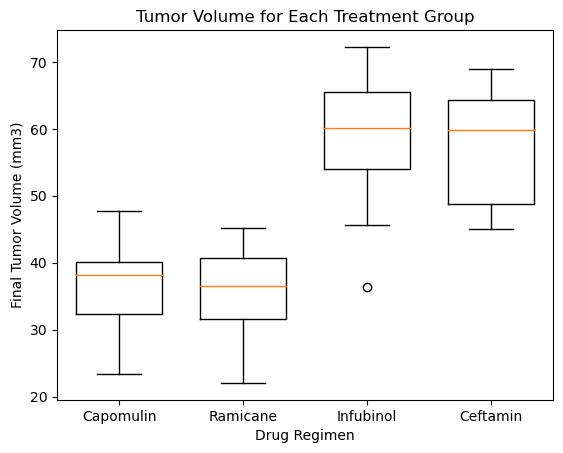

In [147]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
box_plot = [Capomulin_tumor, Ramicane_tumor, Infubinol_tumor, Ceftamin_tumor]
drug_regimen = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

fig1, ax1 = plt.subplots()
plt.xlabel('Drug Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.title('Tumor Volume for Each Treatment Group')
ax1.boxplot(box_plot, labels=drug_regimen, widths = 0.7)
plt.show()


## Line and Scatter Plots

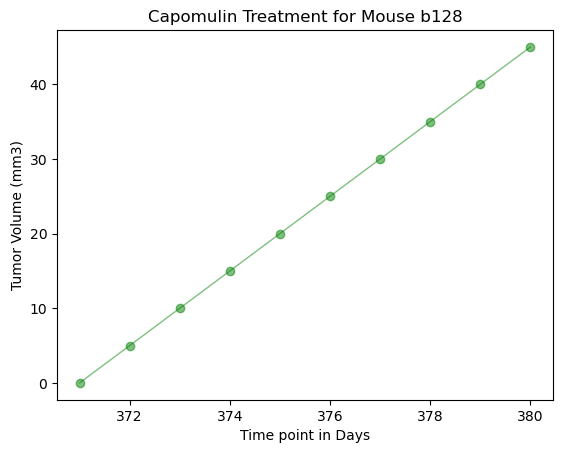

In [243]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
cap_line_plot = Capomulin.loc[Capomulin["Mouse ID"] == "b128",:]
cap_line_plot.head()
#label axis

fig1, ax1 = plt.subplots()
plt.xlabel('Time point in Days')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin Treatment for Mouse b128')
plt.plot(x_axis,linewidth=1,marker="o",color="green",alpha=0.5)
plt.show()


## Correlation and Regression

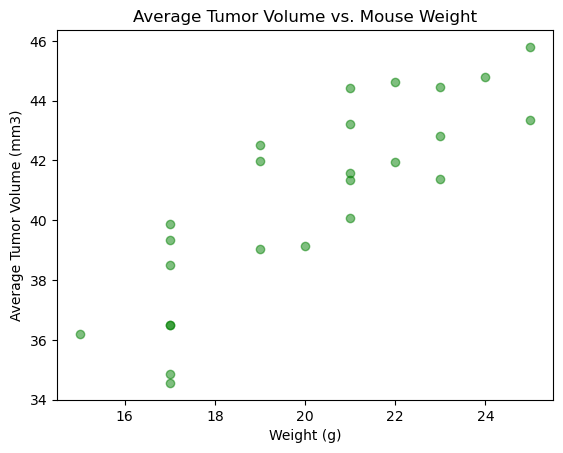

In [242]:
#Create scatter plot to show average tumor volume vs. mouse weight
Capomulin_average =Capomulin.groupby(['Mouse ID']).mean()

plt.scatter(Capomulin_average['Weight (g)'],Capomulin_average['Tumor Volume (mm3)'], color="green", alpha= 0.5)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume vs. Mouse Weight')
plt.show()

The correlation between mouse weight and the average tumor volume is 0.84


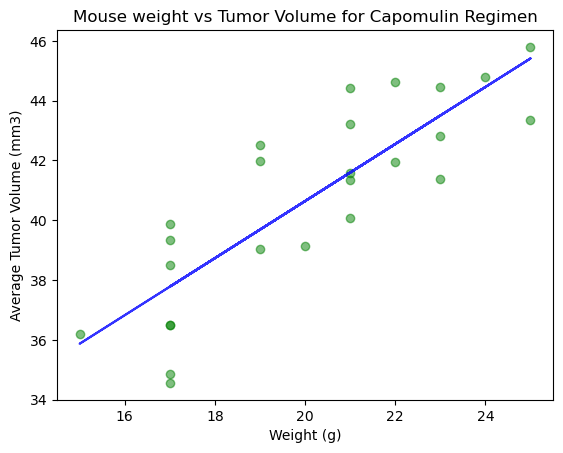

In [241]:
#pearson finds linear correlation
correlation = st.pearsonr(Capomulin_average['Weight (g)'],Capomulin_average['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")


#regression finds the relationship between variables
(slope, intercept,pvalue, rvalue, stderr)=st.linregress(Capomulin_average["Weight (g)"],Capomulin_average["Tumor Volume (mm3)"])
regress_values=Capomulin_average["Weight (g)"]* slope + intercept

set_x_value = Capomulin_average['Weight (g)']
set_y_value = Capomulin_average['Tumor Volume (mm3)']

#create scatter
plt.scatter(Capomulin_average["Weight (g)"],Capomulin_average["Tumor Volume (mm3)"],color='green', alpha = 0.5)
plt.plot(Capomulin_average["Weight (g)"], regress_values, color='blue', alpha = 0.8)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse weight vs Tumor Volume for Capomulin Regimen")
plt.show()